In [166]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import os

In [311]:
def prepareData(path):
    alldata = pd.read_csv(path)
    # Drop the "all" row
    df = alldata.drop(30)
    df["Topic"] = df["Topic"].astype(int)
    df.sort_values(by="Topic", inplace=True)
    return df, alldata.loc[30]["infNDCG"]
datalist = []
datalist.append(prepareData("../../stats/OFFICIAL_baselinewr.csv")+("baselinewr",))
datalist.append(prepareData("../../stats/OFFICIAL_genesnodesc.csv")+("genesnodesc",))
datalist.append(prepareData("../../stats/OFFICIAL_genedis.csv")+("genedis",))
datalist.append(prepareData("../../stats/OFFICIAL_genedispbnb.csv")+("genedispbnb",))
datalist.append(prepareData("../../stats/OFFICIAL_posnegbstadd.csv")+("posnegbstadd",))



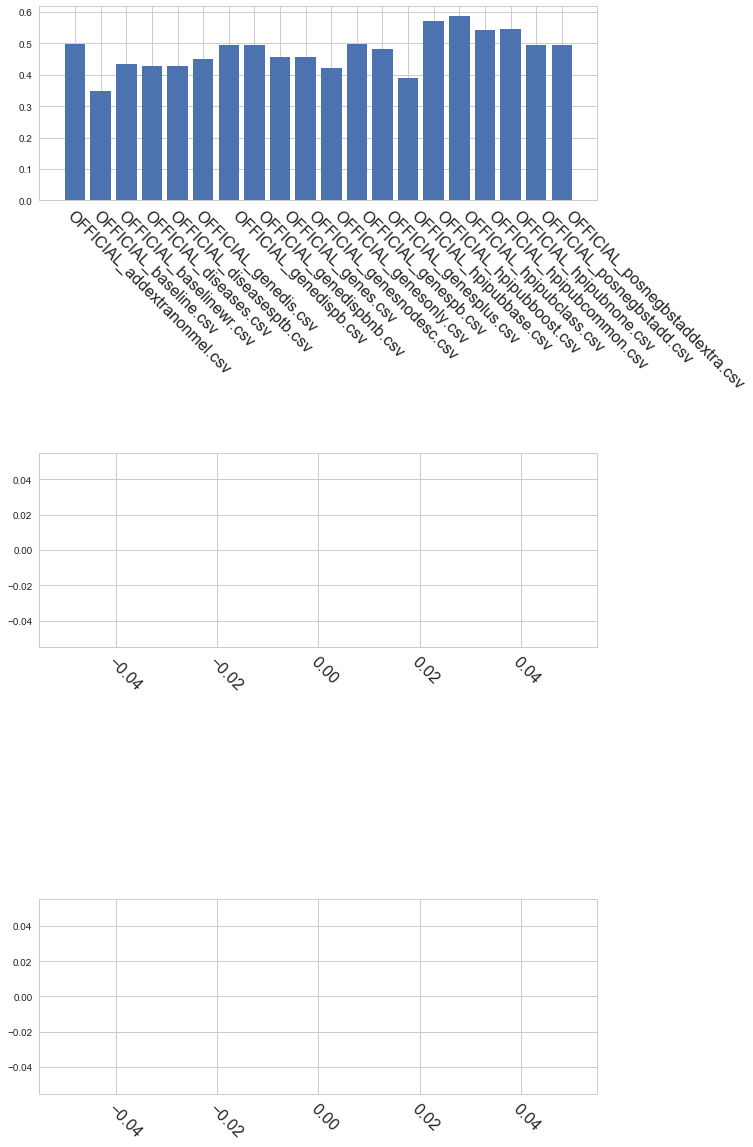

In [276]:
from collections import OrderedDict
statspath = "../../stats/"
statfiles = sorted(list(filter(lambda f: f.endswith(".csv") and not "gspm" in f, os.listdir(statspath))))
statfilespmshould = sorted(list(filter(lambda f: f.endswith(".csv") and "gspm_should" in f, os.listdir(statspath))))
statfilespmmust = sorted(list(filter(lambda f: f.endswith(".csv") and "gspm_must" in f, os.listdir(statspath))))
stats = OrderedDict()
statspmshould = OrderedDict()
statspmmust = OrderedDict()
for file in statfiles:
    _,allinfndcg = prepareData(statspath+file)
    stats[file] = allinfndcg
for file in statfilespmshould:
    _,allinfndcg = prepareData(statspath+file)
    statspmshould[file] = allinfndcg
for file in statfilespmmust:
    _,allinfndcg = prepareData(statspath+file)
    statspmmust[file] = allinfndcg

stats.items()
# very helpful: https://stackoverflow.com/questions/28615887/how-to-move-a-ticks-label-in-matplotlib
statsfig, ax = plt.subplots(3, figsize=(10,20))
plt.subplots_adjust(hspace=1.3)
plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=-45, ha="left", size=16, rotation_mode="anchor" )
plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=-45, ha="left", size=16, rotation_mode="anchor" )
plt.setp( ax[2].xaxis.get_majorticklabels(), rotation=-45, ha="left", size=16, rotation_mode="anchor" )
ax[0].bar(stats.keys(), stats.values());
ax[1].bar(statspmshould.keys(), statspmshould.values());
ax[2].bar(statspmmust.keys(), statspmmust.values());

In [309]:
alldata = pd.read_csv("../../resources/20180622processedGoldStandardTopics.tsv.gz", delimiter="\t")
df = alldata.query("relevance_score > 0").reset_index().groupby('trec_topic_number')['relevance_score']
relevancecounts = df.sum()
relevancecounts = relevancecounts / relevancecounts.max()

(0.4497, 'baselinewr')
(0.474, 'genesnodesc')
(0.4797, 'genedis')
(0.5422, 'genedispbnb')
(0.5376, 'posnegbstadd')


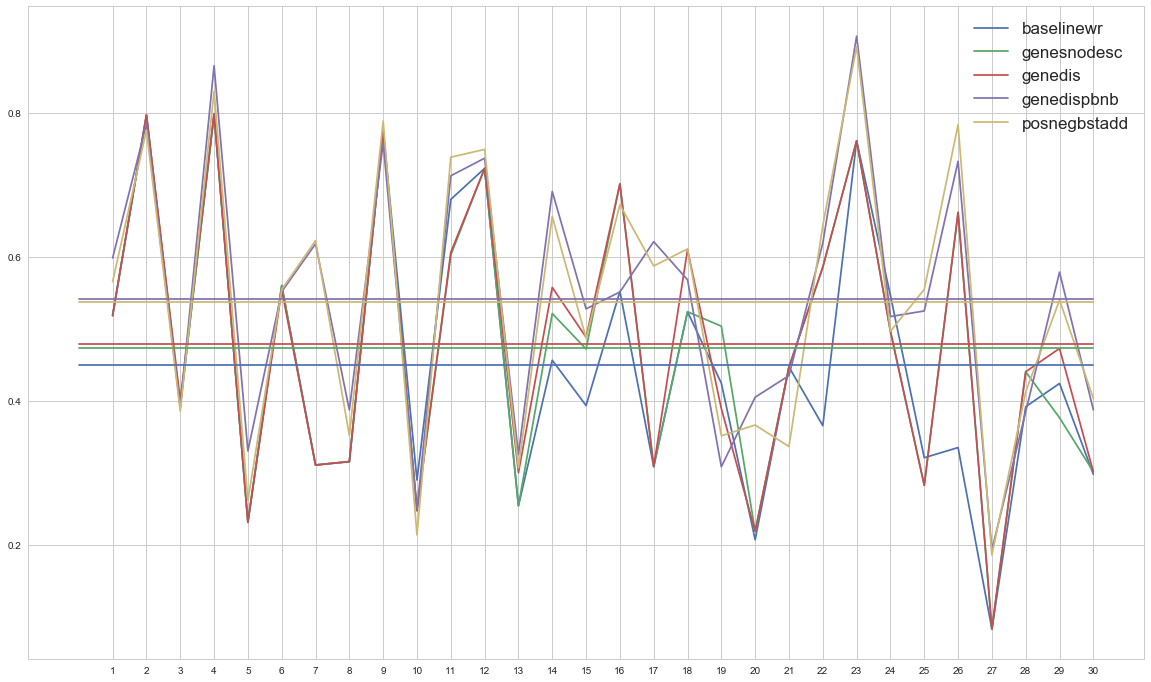

In [312]:
fig = plt.figure(figsize=(20,12))
for datatuple in datalist:
    data = datatuple[0]
    label = datatuple[2]
    plt.plot(data["Topic"], data["infNDCG"], label=label);

#plt.plot(relevancecounts);
firstdata = datalist[0][0]
plt.xticks(np.arange(min(firstdata["Topic"]), max(firstdata["Topic"])+1, 1.0))

leg = plt.legend(prop={'size': 17})
handles = leg.legendHandles
colors = {}
for handle in handles:
    colors[handle._label] = handle.get_color()
for datatuple in datalist:
    allvalue = datatuple[1]
    label = datatuple[2]
    plt.plot([0,30], [allvalue, allvalue], color = colors[label])

for t in [(allvalue,label) for _,allvalue,label in datalist]:
    print(t)
    
#(0.4497, 'baselinewr')
#(0.5198, 'genedispb')
#(0.5232, 'genespb')
#(0.475, 'genedis')
#(0.4802, 'genes')

#(0.4497, 'baselinewr')
#(0.4795, 'genedispb')
#(0.479, 'genespb')
#(0.4384, 'genedis')
#(0.4472, 'genes')



- gene_boost, disease_boost = 1.0:
    (0.4497, 'baselinewr')
(0.4795, 'genedispb')
(0.479, 'genespb')
(0.4384, 'genedis')
(0.4472, 'genes')
- gene_boost, disease_boost = 1.5:
    (0.4497, 'baselinewr')
(0.5198, 'genedispb')
(0.5232, 'genespb')
(0.475, 'genedis')
(0.4802, 'genes')


In [61]:
plt.plot?